## Quantitative trading in China A stock market with FinRL

### Import modules

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from IPython import display
display.set_matplotlib_formats("svg")

from finrl_meta import config
from finrl_meta.data_processors.processor_tusharepro import TushareProProcessor, ReturnPlotter
from finrl_meta.env_stock_trading.env_stocktrading_A import StockTradingEnv
from drl_agents.stablebaselines3_models import DRLAgent
pd.options.display.max_columns = None
    
print("ALL Modules have been imported!")

ALL Modules have been imported!


### Create folders

In [ ]:
import os
if not os.path.exists("./datasets" ):
    os.makedirs("./datasets" )
if not os.path.exists("./trained_models"):
    os.makedirs("./trained_models" )
if not os.path.exists("./tensorboard_log"):
    os.makedirs("./tensorboard_log" )
if not os.path.exists("./results" ):
    os.makedirs("./results" )

### Download data, cleaning and feature engineering

In [ ]:
ticket_list=['600000.SH', '600009.SH', '600016.SH', '600028.SH', '600030.SH',
       '600031.SH', '600036.SH', '600050.SH', '600104.SH', '600196.SH',
       '600276.SH', '600309.SH', '600519.SH', '600547.SH', '600570.SH']

train_start_date='2015-01-01'
train_stop_date='2019-08-01'
val_start_date='2019-08-01'
val_stop_date='2021-01-03'

token='27080ec403c0218f96f388bca1b1d85329d563c91a43672239619ef5'

In [ ]:
# download and clean
ts_processor = TushareProProcessor("tusharepro", token=token)
ts_processor.download_data(ticket_list, train_start_date, val_stop_date, "1D")
ts_processor.clean_data()
ts_processor.dataframe

100%|██████████| 15/15 [00:08<00:00,  1.81it/s]


Shape of DataFrame:  (21574, 8)
Please wait for a few seconds...
Shape of DataFrame:  (21930, 8)


tic        date     open     high      low    close       volume  \
0      600000.SH  2015-01-05    15.88    16.25    15.56    16.07   5135687.09   
1      600009.SH  2015-01-05    19.82    20.91    19.82    20.53    371485.54   
2      600016.SH  2015-01-05    10.87    10.96    10.50    10.78   9138873.70   
3      600028.SH  2015-01-05     6.59     7.14     6.45     7.14  11864996.45   
4      600030.SH  2015-01-05    33.90    35.25    33.01    34.66   6986272.15   
...          ...         ...      ...      ...      ...      ...          ...   
21925  600276.SH  2020-12-31   112.55   112.66   110.01   111.46    281568.85   
21926  600309.SH  2020-12-31    89.88    91.48    88.70    91.04    213631.34   
21927  600519.SH  2020-12-31  1941.00  1998.98  1939.00  1998.00     38860.07   
21928  600547.SH  2020-12-31    23.60    23.75    23.48    23.62    213786.94   
21929  600570.SH  2020-12-31   102.88   105.00   102.36   104.90    182603.40   

       day  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  
...    ...  
21925  3.0  
21926  3.0  
21927  3.0  
21928  3.0  
21929  3.0  

[21930 rows x 8 columns]

In [ ]:
# add_technical_indicator
ts_processor.add_technical_indicator(config.TECHNICAL_INDICATORS_LIST)
ts_processor.clean_data()
ts_processor.dataframe

Succesfully add technical indicators
Please wait for a few seconds...
Shape of DataFrame:  (21915, 15)


tic        date     open     high      low    close       volume  \
0      600000.SH  2015-01-06    16.00    16.68    15.82    16.13   5116845.35   
1      600009.SH  2015-01-06    20.18    20.18    19.73    20.00    198117.45   
2      600016.SH  2015-01-06    10.70    10.80    10.28    10.42   8965716.53   
3      600028.SH  2015-01-06     7.18     7.22     6.81     7.00  10899984.33   
4      600030.SH  2015-01-06    33.80    35.58    33.56    34.71   6681193.68   
...          ...         ...      ...      ...      ...      ...          ...   
21910  600276.SH  2020-12-31   112.55   112.66   110.01   111.46    281568.85   
21911  600309.SH  2020-12-31    89.88    91.48    88.70    91.04    213631.34   
21912  600519.SH  2020-12-31  1941.00  1998.98  1939.00  1998.00     38860.07   
21913  600547.SH  2020-12-31    23.60    23.75    23.48    23.62    213786.94   
21914  600570.SH  2020-12-31   102.88   105.00   102.36   104.90    182603.40   

       day       macd      boll_ub      boll_lb      rsi_30       dx_30  \
0      1.0   0.001346    16.184853    16.015147  100.000000  100.000000   
1      3.0  -0.016008    20.663897    19.736103   12.828915  100.000000   
2      1.0  -0.008077    11.109117    10.090883    0.000000  100.000000   
3      1.0  -0.003141     7.267990     6.872010    0.000000  100.000000   
4      1.0   0.001122    34.755711    34.614289  100.000000  100.000000   
...    ...        ...          ...          ...         ...         ...   
21910  3.0   5.999563   120.049291    81.980709   65.497668   49.657169   
21911  3.0   1.723646    92.780907    79.425093   58.501768   38.129756   
21912  3.0  42.535547  1942.989267  1761.052733   66.422960   52.684229   
21913  3.0  -0.252554    24.495355    23.032645   42.060734    0.003164   
21914  3.0   1.232803   106.208096    91.214904   56.711178   26.076600   

       close_30_sma  close_60_sma  
0         16.100000     16.100000  
1         20.200000     20.200000  
2         10.600000     10.600000  
3          7.070000      7.070000  
4         34.685000     34.685000  
...             ...           ...  
21910     96.356667     92.992167  
21911     85.693000     84.104667  
21912   1815.039333   1761.921500  
21913     23.883667     24.534000  
21914     95.407333     94.708000  

[21915 rows x 15 columns]

### Split traning dataset

In [ ]:
train =ts_processor.data_split(ts_processor.dataframe, train_start_date, train_stop_date)       
len(train.tic.unique())

15

In [ ]:
train.tic.unique()

array(['600000.SH', '600009.SH', '600016.SH', '600028.SH', '600030.SH',
       '600031.SH', '600036.SH', '600050.SH', '600104.SH', '600196.SH',
       '600276.SH', '600309.SH', '600519.SH', '600547.SH', '600570.SH'],
      dtype=object)

In [ ]:
train.head()

tic        date   open   high    low  close       volume  day  \
0  600000.SH  2015-01-06  16.00  16.68  15.82  16.13   5116845.35  1.0   
0  600009.SH  2015-01-06  20.18  20.18  19.73  20.00    198117.45  3.0   
0  600016.SH  2015-01-06  10.70  10.80  10.28  10.42   8965716.53  1.0   
0  600028.SH  2015-01-06   7.18   7.22   6.81   7.00  10899984.33  1.0   
0  600030.SH  2015-01-06  33.80  35.58  33.56  34.71   6681193.68  1.0   

       macd    boll_ub    boll_lb      rsi_30  dx_30  close_30_sma  \
0  0.001346  16.184853  16.015147  100.000000  100.0        16.100   
0 -0.016008  20.663897  19.736103   12.828915  100.0        20.200   
0 -0.008077  11.109117  10.090883    0.000000  100.0        10.600   
0 -0.003141   7.267990   6.872010    0.000000  100.0         7.070   
0  0.001122  34.755711  34.614289  100.000000  100.0        34.685   

   close_60_sma  
0        16.100  
0        20.200  
0        10.600  
0         7.070  
0        34.685

In [ ]:
train.shape

(16725, 15)

In [ ]:
stock_dimension = len(train.tic.unique())
state_space = stock_dimension*(len(config.TECHNICAL_INDICATORS_LIST)+2)+1
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 15, State Space: 136


### Train

In [ ]:
env_kwargs = {
    "stock_dim": stock_dimension,
    "hmax": 1000, 
    "initial_amount": 1000000, 
    "buy_cost_pct":6.87e-5,
    "sell_cost_pct":1.0687e-3,
    "reward_scaling": 1e-4,
    "state_space": state_space, 
    "action_space": stock_dimension,
    "tech_indicator_list": config.TECHNICAL_INDICATORS_LIST, 
    "print_verbosity": 1,
    "initial_buy":True,
    "hundred_each_trade":True
}

e_train_gym = StockTradingEnv(df = train, **env_kwargs)

In [ ]:
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))

<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


In [ ]:
agent = DRLAgent(env = env_train)
DDPG_PARAMS = {
                "batch_size": 256, 
               "buffer_size": 50000, 
               "learning_rate": 0.0005,
               "action_noise":"normal",
                }
POLICY_KWARGS = dict(net_arch=dict(pi=[64, 64], qf=[400, 300]))
model_ddpg = agent.get_model("ddpg", model_kwargs = DDPG_PARAMS, policy_kwargs=POLICY_KWARGS)

{'batch_size': 256, 'buffer_size': 50000, 'learning_rate': 0.0005, 'action_noise': NormalActionNoise(mu=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], sigma=[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1])}
Using cuda device


In [ ]:
trained_ddpg = agent.train_model(model=model_ddpg, 
                              tb_log_name='ddpg',
                              total_timesteps=1000)


Logging to tensorboard_log/ddpg/ddpg_46
Episode: 2
day: 1114, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 3040118.12
total_reward: 2040118.12
total_cost: 13829.26
total_trades: 16708
Sharpe: 1.025


### Trade

In [ ]:
trade = ts_processor.data_split(df, val_start_date, val_stop_date)
env_kwargs = {
    "stock_dim": stock_dimension,
    "hmax": 1000, 
    "initial_amount": 1000000, 
    "buy_cost_pct":6.87e-5,
    "sell_cost_pct":1.0687e-3,
    "reward_scaling": 1e-4,
    "state_space": state_space, 
    "action_space": stock_dimension,
    "tech_indicator_list": config.TECHNICAL_INDICATORS_LIST, 
    "print_verbosity": 1,
    "initial_buy":False,
    "hundred_each_trade":True
}
e_trade_gym = StockTradingEnv(df = trade, **env_kwargs)

In [ ]:
df_account_value, df_actions = DRLAgent.DRL_prediction(model=trained_ddpg,
                       environment = e_trade_gym)

Episode: 2
day: 345, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1978179.34
total_reward: 978179.34
total_cost: 68.66
total_trades: 3450
Sharpe: 1.988
hit end!


In [ ]:
df_actions.to_csv("action.csv",index=False)
df_actions

600000.SH  600009.SH  600016.SH  600028.SH  600030.SH  600031.SH  \
date                                                                           
2019-08-01          0          0          0          0          0          0   
2019-08-02          0          0          0          0          0          0   
2019-08-05          0          0          0          0          0          0   
2019-08-06          0          0          0          0          0          0   
2019-08-07          0          0          0          0          0          0   
...               ...        ...        ...        ...        ...        ...   
2020-12-24          0          0          0          0          0          0   
2020-12-25          0          0          0          0          0          0   
2020-12-28          0          0          0          0          0          0   
2020-12-29          0          0          0          0          0          0   
2020-12-30          0          0          0          0          0          0   

            600036.SH  600050.SH  600104.SH  600196.SH  600276.SH  600309.SH  \
date                                                                           
2019-08-01          0          0          0        100          0        500   
2019-08-02          0          0          0          0          0          0   
2019-08-05          0          0          0          0          0          0   
2019-08-06          0          0          0          0          0          0   
2019-08-07          0          0          0          0          0          0   
...               ...        ...        ...        ...        ...        ...   
2020-12-24          0          0          0          0          0          0   
2020-12-25          0          0          0          0          0          0   
2020-12-28          0          0          0          0          0          0   
2020-12-29          0          0          0          0          0          0   
2020-12-30          0          0          0          0          0          0   

            600519.SH  600547.SH  600570.SH  
date                                         
2019-08-01        900       1000       1000  
2019-08-02          0          0          0  
2019-08-05          0          0          0  
2019-08-06          0          0          0  
2019-08-07          0          0          0  
...               ...        ...        ...  
2020-12-24          0          0          0  
2020-12-25          0          0          0  
2020-12-28          0          0          0  
2020-12-29          0          0          0  
2020-12-30          0          0          0  

[345 rows x 15 columns]

### Backtest

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


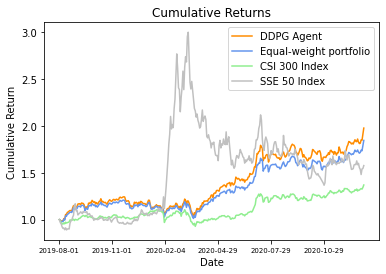

In [ ]:
%matplotlib inline
plotter = ReturnPlotter(df_account_value, trade, val_start_date, val_stop_date)
plotter.plot_all()

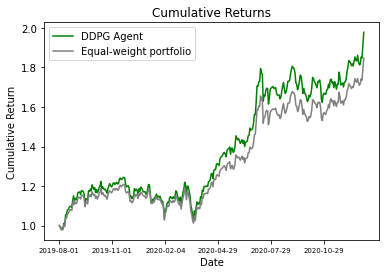

In [ ]:
%matplotlib inline
plotter.plot()

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


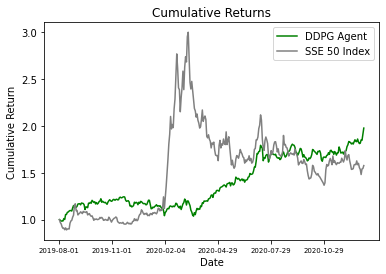

In [ ]:
%matplotlib inline
# ticket: SSE 50：000016
plotter.plot("000016")

#### Use pyfolio

In [ ]:
# CSI 300
baseline_df = plotter.get_baseline("399300")

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


In [ ]:
import pyfolio
from pyfolio import timeseries
daily_return = plotter.get_return(df_account_value)
daily_return_base = plotter.get_return(baseline_df, value_col_name="close")

perf_func = timeseries.perf_stats
perf_stats_all = perf_func(returns=daily_return, 
                              factor_returns=daily_return_base, 
                                positions=None, transactions=None, turnover_denom="AGB")
print("==============DRL Strategy Stats===========")
perf_stats_all

==============DRL Strategy Stats===========


Annual return          0.643529
Cumulative returns     0.978179
Annual volatility      0.269066
Sharpe ratio           1.988102
Calmar ratio           3.864869
Stability              0.827282
Max drawdown          -0.166507
Omega ratio            1.403280
Sortino ratio          3.049305
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.393870
Daily value at risk   -0.031776
Alpha                  0.358040
Beta                   0.919107
dtype: float64

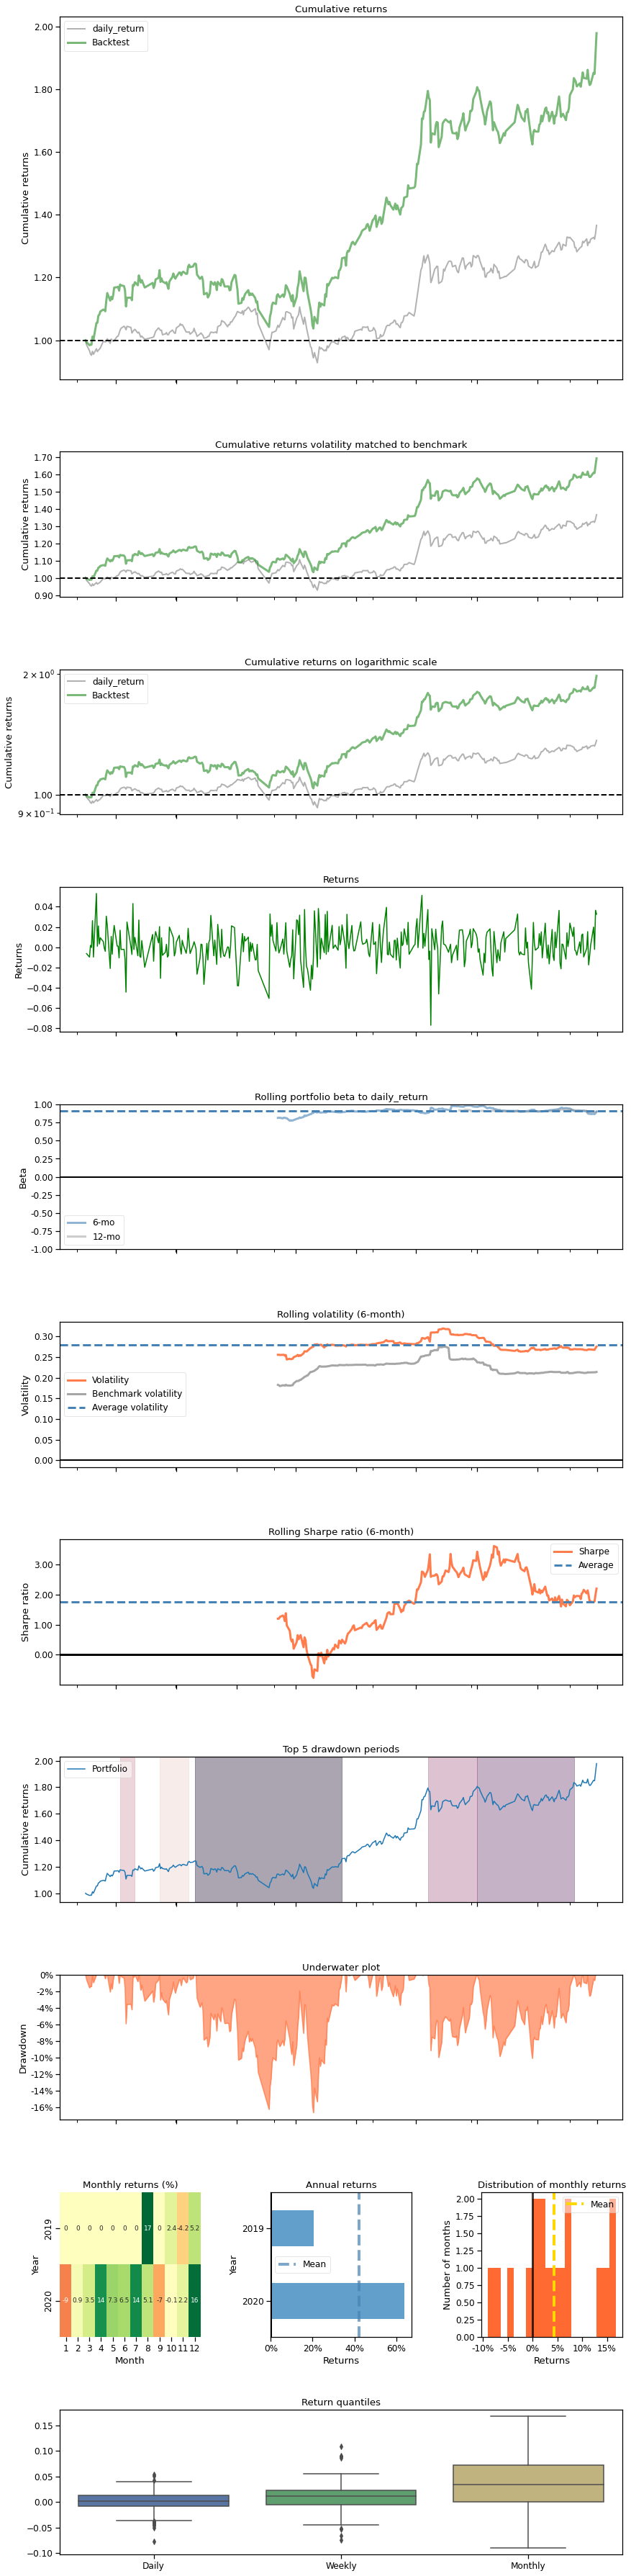

In [ ]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
        pyfolio.create_full_tear_sheet(returns = daily_return,
                                       benchmark_rets = daily_return_base, set_context=False)

### Authors
github username: oliverwang15, eitin-infant